# Всероссийская олимпиада студентов «Я — профессионал»

# `Машинное обучение`. Полуфинал 
---

<div style="text-align: right"> 
    
    Александр Широков 
</div> 

---

# 1. Постановка задачи

В реальной жизни для изучения свойств целевого пласта на месторождении бурятся скважины, после чего в них опускаются специальные устройства - **каротажные зонды** - измерительные устройства, используемые при геофизических исследованиях в скважине, содержащие приёмники (естественного gamma-излучения, например).  С их помощью проводится запись различных геофизических полей (например, *радиоактивность* или *плотность*), создаваемых горными породами. Подобные исследования называются **геофизическими исследования скважин** - *ГИС*. 

На основе полученных данных специалисты петрофизики проводят интерпретацию и сообщают информацию о том, на какой *глубине* находится **пласт-коллектор** (пласты, содержащие углеводороды), который может накапливать и отдавать флюиды. Типичный пример различных каротажных кривых и их совместной интерпретации представлен на рисунке ниже:

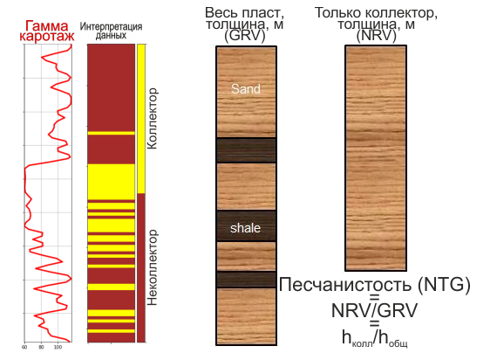

> Рисунок 1

На основе полученной интерпретации можно посчитать такое свойство как **песчанистость** в *зоне бурения скважины*.

**Песчанистость** — это отношение *толщин пластов-коллекторов* к общей толщине *геологического образования*. Данная характеристика позволяет геологам делать предположения об экономической эффективности работы с этим месторождением.

К сожалению, бурение скважин является очень дорогостоящей операцией, поэтому мы используем различные алгоритмы картопостроения с целью прогноза свойств в межскважинном пространстве. В качестве данных в представленной задаче используется информация из синтетической модели месторождения, которая была построена на основе геологического обнажения `Шестаково, Кемеровская область`. По его описанию были определены различные геологические параметры (размеры и геометрия тел, их связанность и значение песчанистости), которые в дальнейшем использовались при построении 3D модели. Подобный подход позволил достаточно точно отобразить реальную геологию (которая обычно не доступна для визуального анализа) и использовать полученный результат в качестве полигона для опробования и оценки различных подходов.

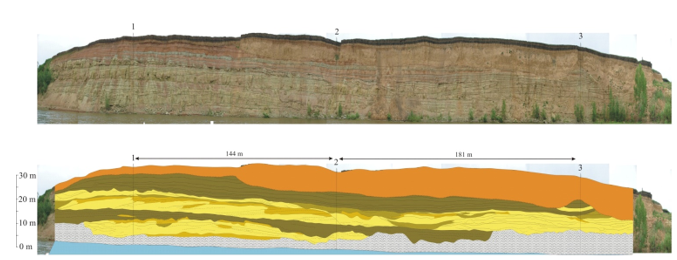

> Рисунок 2

В предоставленном наборе данных имеется информация о `10%` *скважинных данных* (в реальной жизни их может быть менее `1%` от площади месторождения!), используя которые, Вам предлагается построить алгоритм, который бы **предсказывал значения песчанистости** в точках с отсутствующими значениями.

# 2. Данные

## 2.1 Тренировочный датасет

**Вход**: тренировочный датасет (`Training wells.csv`) с заполненными значениями песчанистости.

## 2.2. Тестовый датасет

Тестовый датасет (`Empty part.csv`) с пропущенными значениями песчанистости, для которого вы должны предсказать эти значения. [Ссылка](https://disk.yandex.ru/d/M6J9r7yvR8m3GQ?w=1).

## 2.3. Предсказание

**Выход**: файл с предсказанием песчанитости для тестового файла. 

В выходном файле:

- последовательность строк сохранить
- само предсказание песчанистости добавить четвёртым столбцом в датасет с заголовком столбца `NTG`, как это сделано в тренировочном датасете. 

Получившийся файл загрузить в систему.

## 2.4. Критерии оценивания

В качестве метрики оценивания используется метрика `RMSE`, участники ранжируются относительно значения этой метрики (от меньшего к большему).

За каждую отправку вы не будете видеть балл во избежание подгона под ответ, но будете видеть статус отправки (если всё хорошо - `ОК`, если проблемы с файлом - `WA`). Затем по итогу всех отправок будет засчитана *лучшая попытка*.

## 2.5. Правила игры

В этой задаче вам необходимо загрузить свой `Jupyter Notebook` (или скрипт с решением на том языке программирования, на котором вы разрабатывали решение) со всеми способами решения задачи, которые вы испробовали. 

Строгих правил оформления скрипта нет, главное, чтобы в скрипте было показано:

- как вы обрабатывали датасет
- как обучали и тестировали модели. 

Сам скрипт загружается один раз и автоматически никак не проверяется. Скрипт будет использован в финале для вашей защиты решений.

*Максимальный размер загружаемого файла* - `300 MB`.

В каждом своём скрипте решения сохраняйте время и номер отправки (это вы делаете на своей стороне), чтобы потом сопоставить с полученными баллами за каждую отправку на этапе апелляции. 

*Итоговый скрипт, который вы отправляете в этой задаче*, сохраните до финала.

# 3. Предварительный анализ данных

## 3.1. Первичный статистический анализ. Визуализация

In [401]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
train_data = pd.read_csv('data/Training_wells.csv')
test_data = pd.read_csv('data/Empty_part.csv')

Данные содержат в себе информацию о `10` процентах *скважинных данных*.

In [403]:
print(f'Train shape: {train_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (138, 4)
Test shape: (1242, 3)


In [404]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Well    138 non-null    object 
 1   X       138 non-null    int64  
 2   Y       138 non-null    int64  
 3   NTG     138 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.4+ KB


Информация о входных данных:

- $X$ - координата скважины по оси $X$;
- $Y$ - координата скважины по оси $Y$;
- $\text{Well}$ = `X-Y` - уникальный идентификатор каждой скважины;
- $\text{NTG}$ - песчаснистость

1. Диаграмма рассеивания в осях $(X, Y)$ тренировочной выборки

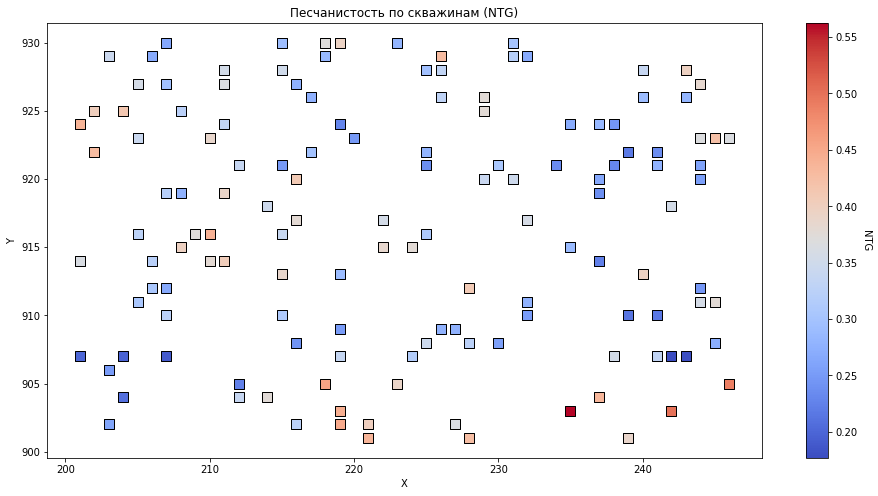

In [1505]:
n = train_data.shape[0]
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))

im = ax1.scatter(train_data['X'], 
                 train_data['Y'], 
                 cmap='coolwarm', 
                 c=train_data['NTG'], 
                 marker='s',
                 edgecolors='black',
                 s=100)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('NTG', 
                   rotation=-90, 
                   va="bottom")
ax1.set_title('Песчанистость по скважинам (NTG)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

plt.show()

2. Гистограмма `NTG`

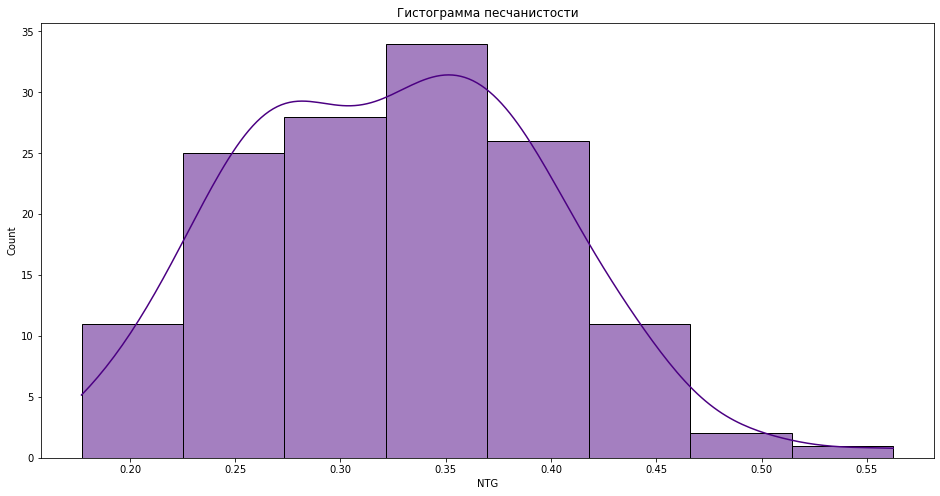

In [1507]:
fig, ax2 = plt.subplots(1, 1, figsize=(16, 8))

sns.histplot(data=train_data['NTG'], 
             ax=ax2, 
             bins=int(np.log2(n)) + 1, 
             color='indigo', 
             kde=True)
ax2.set_title('Гистограмма песчанистости')

plt.show()

Гистограмма похожа на плотность нормального распределения, но при проверке статистическим тестом на нормальность выясняется, что оно таким не является.

In [1512]:
from scipy import stats
_, pvalue = stats.normaltest(train_data['NTG'])
pvalue

0.4294535379575585

3. Диаграмма рассеивания в осях $(X, Y)$ *тренировчной* + *тестовой* выборки

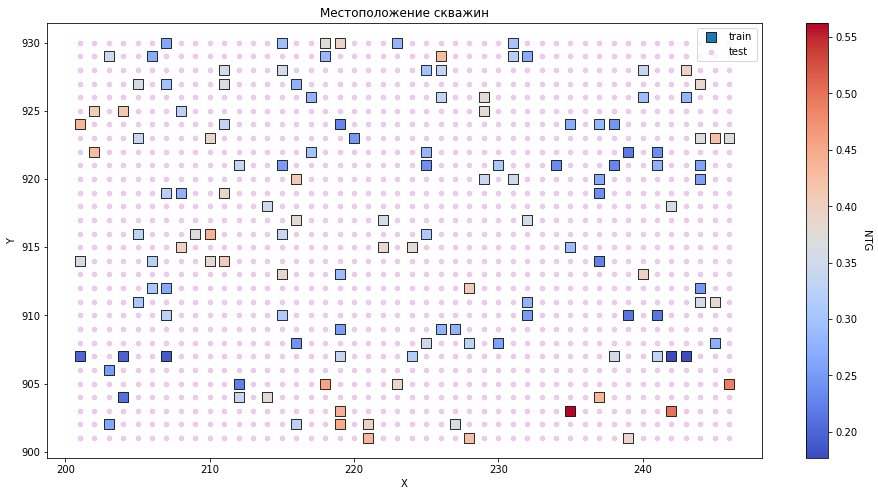

In [1513]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))

im = ax1.scatter(train_data['X'], 
                 train_data['Y'], 
                 cmap='coolwarm', 
                 c=train_data['NTG'], 
                 marker='s',
                 edgecolors='black',
                 s=100, 
                 label='train')
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('NTG', 
                   rotation=-90, 
                   va="bottom")
test_data.plot(kind='scatter', 
               x='X', 
               y='Y', 
               color='plum', 
               ax=ax1, 
               label='test', 
               alpha=0.5)
ax1.set_title('Местоположение скважин')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

plt.show()

*Вывод*: 

Как видно на графике выше, координаты скважин на тренировочном и тестовом наборе данных представляют из себя сетку с шагом $1$ по $X \in [201, \ldots, 246]$ и по $Y \in [901, 930]$. Местоположение скважин наталкивает на мысль о том, что находящиеся близко друг от друга скважины могут иметь похожую *песчанистость*. 

Расстояние между скважинами в данной работе будет высчитываться по двум основным метрикам:

- $l_1$-норма (расстояние городских кварталов, *Манхэттенская метрика*) 

$$L_1 = \rho(u, v) = \sum\limits_{i=1}^n \vert u_i - v_i\vert$$

- $l_2$-норма (*Евклидово расстояние*)

$$L_2 = \rho(u, v) = \sqrt{\sum\limits_{i=1}^n (u_i - v_i)^2}$$

> Проверка данных на отсутствие пропусков по координатным осям

In [407]:
x_range = np.sort(np.unique(np.r_[pd.unique(train_data['X']), pd.unique(test_data['X'])]))
x_range_1 = np.arange(np.min(x_range), np.max(x_range)+1, 1)
np.all([x_range == x_range_1])

True

In [408]:
y_range = np.sort(np.unique(np.r_[pd.unique(train_data['Y']), pd.unique(test_data['Y'])]))
y_range_1 = np.arange(np.min(y_range), np.max(y_range)+1, 1)
np.all([y_range == y_range_1])

True

In [409]:
46 * 30 == train_data.shape[0] + test_data.shape[0]

True

> Функция для визуализации предсказания песчанистости.

In [1526]:
def visualisation_results_2(train_data: pd.DataFrame, test_data: pd.DataFrame, 
                            name_of_prediction_column: str=None):
    train_data, test_data = train_data.copy(), test_data.copy()
    
    pred = test_data[['X', 'Y', name_of_prediction_column]]
    pred.columns = ['X', 'Y', 'NTG']
    full = pred.append(data)
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    im = plt.scatter(full['X'], 
                     full['Y'], 
                     cmap='coolwarm',
                     c=full['NTG'], 
                     marker='s', 
                     s=293, 
                     alpha=0.8)
    
    cbar = fig.colorbar(im)
    cbar.ax.set_ylabel('NTG', 
                       rotation=-90, 
                       va="bottom")
    
    ax.scatter(train_data['X'], 
               train_data['Y'], 
               c = 'white',
               marker='o', 
               edgecolors='green',
               s=30, 
               label='train')
    
    ax.legend()
    ax.set_title('Песчанистость по скважинам (NTG)', fontsize=20)
    ax.set_xlabel('X', fontsize=16)
    ax.set_ylabel('Y', fontsize=16)

    plt.show()

> Функция для визуализации гистограммы предсказаний

In [1552]:
def show_hist(test_data, column):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sns.histplot(test_data[column], kde=True, fill=True, stat='density', label=f'{column}')
    ax.legend()
    plt.show()

## 3.2. Возможная кластеризация по уровням

Рассмотрим подробнее рисунок 2.

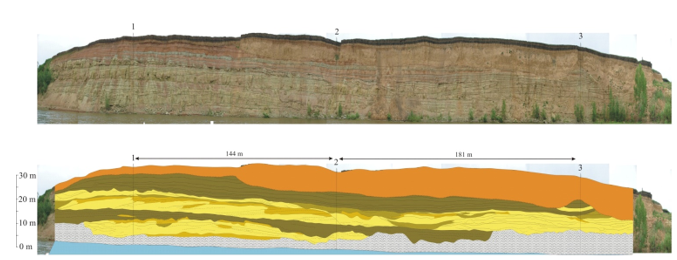

Назовём *уровнем* определённое значение по оси $Y$. Как видно из рисунка, песчанистость, скорее всего, остаётся одинаковой (похожей) на некотором определённом уровне (для каждого уровня значение своё). Поэтому, появилась идея о кластеризации скважин по уровням оси $Y$ с дальнейшим выделением признаков для каждого кластера.

> Проверка гипотезы о возможности кластеризации

Проверим эту гипотезу на основании:
- визуаулизации
- метрики `Silhouette`

Будем использовать кластеризацию `KMeans` по признаку $Y$.

In [1516]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}
color = list(overlap)
color_2 = [f'C{x}' for x in range(0, 30)]

Сначала визуализируем кластеры при малых значениях разбиения кластеров

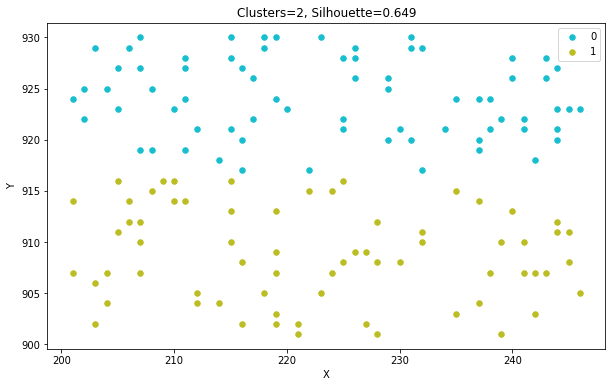

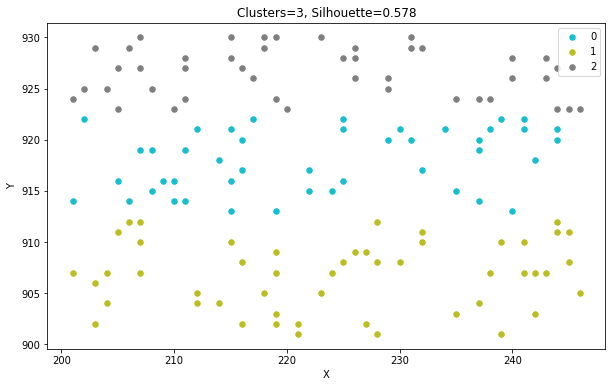

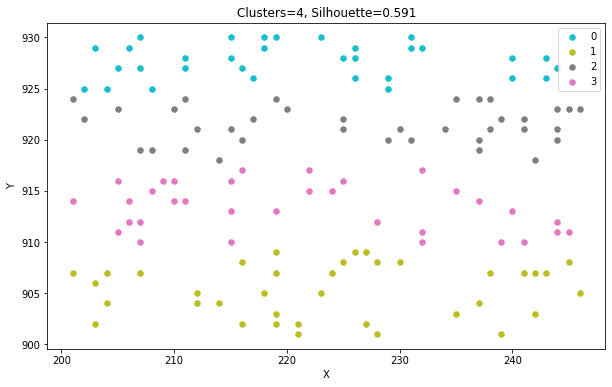

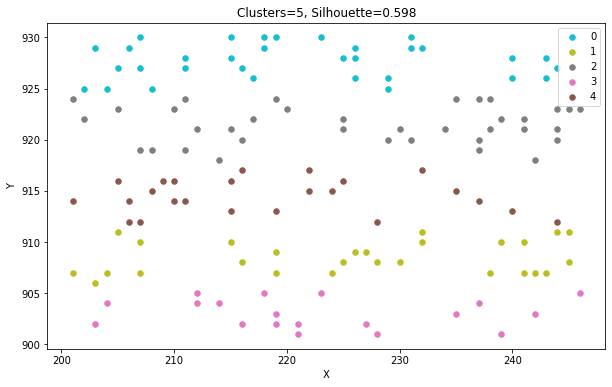

In [1525]:
d = {}
for k in np.arange(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data[['Y']])
    fig, ax = plt.subplots(1,1,figsize=(10, 6))
    train_data['cluster'] = kmeans.labels_
    d[k] = silhouette_score(X=train_data[['Y']], labels=kmeans.labels_)
    for i in np.unique(train_data['cluster']):
        train_data[train_data['cluster'] == i].plot(kind='scatter', 
                                                    x='X', 
                                                    y='Y', 
                                                    ax=ax, color=color_2[::-1][i], 
                                                    s=30, 
                                                    label=f'{i}')
    ax.set_title(f'Clusters={k}, Silhouette={d[k]:.3}')
    ax.legend()
    plt.show()

Видно, что данные кластеризуются по некоторым горизотальным уровням. На $30$ кластерах данные кластеризуются по каждому из уровней $Y$: от $901$ до $930$. 

*Вывод*: идеи кластеризации данных разумна и будет использована для генерации дополнительных признаков для каждого кластера.

## 3.3. Основные идеи, используемые в работе

Основные идеи, используемые в работе:

- использование данных о местоположении скважин;
- нахождение ближайших соседей для скважин по расстоянию;
- использование следующего свойства: песчанистость имеет тенденцию быть практически одинаковой на примерно одинаковых *уровнях* $Y$;
- использование `Radial Basis Function (RBF)`

# 4. Алгоритмы

Каждый алгоритм будет описываться следующими пунктами:

1. Описание алгоритма;
2. Программный код алгоритма;
3. Визуализация предсказаний алгоритма;
4. Выводы по результатам;
5. Сохранение попытки

Для оценки обобающей способности алгоритмов будет использоваться следующий стек технологий:

- оценка качества алгоритма по метрике *RMSE* с помощью скользящего контроля
- скользящий контроль - разбиение тренировчного набора данных на $5$ фолдов `KFold` с перемешиванием (`shuffle=True`)
- подбор оптимальных параметров по сетке (`GridSearch`)

## 4.1. `Submission 1` - Ближайшие соседи на уровне

1. *Описание алгоритма*

Построим матрицу $M \in \mathbb{R}^{30 \times 46}$, где каждый элемент $m_{ij}, i \in 1, \ldots, 30; \ j \in 1, \ldots, 46$ равен значению песчанистости в данной скважине с координатам $X,Y$ из тренировочной выборки, либо 0, если скважина находится в тестовой выборке. По мере предсказания алгоритмом нулевые значения должны заполниться некоторыми значениями.

За одну итерацию алгоритма будем проходить по каждому элементу матрицы и, если он является нулевым (то есть скважина находится в тестовом множестве) будем заполнять её максимальным значением из двух соседних (слева и справа) ячеек (если в этих ячейках есть нунулевые значения).

Матрица заполняется до тех пор, пока в ней не окажется нулевых значений.

2. *Программный код алгоритма*

In [418]:
x_range, y_range = np.arange(201, 247, 1), np.arange(901, 931, 1)
mapx = dict(zip(range(0, x_range.shape[0]), x_range))
mapy = dict(zip(range(0, y_range.shape[0]), y_range))

In [419]:
test_data.set_index('Well', inplace=True)

In [420]:
test_data['sub1'] = 0

In [1459]:
_, _, m = build_matrix(train_data, test_data)
x1, x2 = m.shape

m1 = m.copy()

previous_result = m1[m1!=0].shape[0]
value = 0.3
while m1[m1!=0].shape[0] != 46*30:
    for i in range(x1):
        for j in range(x2):
            count = 0
            if m1[i, j] == 0:
                d = {'left': (i, j-1), 
                     'right': (i, (j + 1)), 
                    }
                dummy = []
                for k, (v1, v2) in d.items():
                    if v1 >=0 and v2>=0 and v1 < x1 and v2 < x2:
                        dummy.append(m1[v1, v2])
                        count +=1
                if dummy.count(0) / len(dummy) < value:
                    m1[i, j] = np.max(dummy)
                    test_data.loc[f'{mapx[j]}-{mapy[i]}', 'sub_nn'] = np.max(dummy)
                    
    current_result = m1[m1!=0].shape[0]
    if current_result == previous_result:
        value += 0.01
    previous_result = current_result

3. Визуализация предсказаний алгоритма

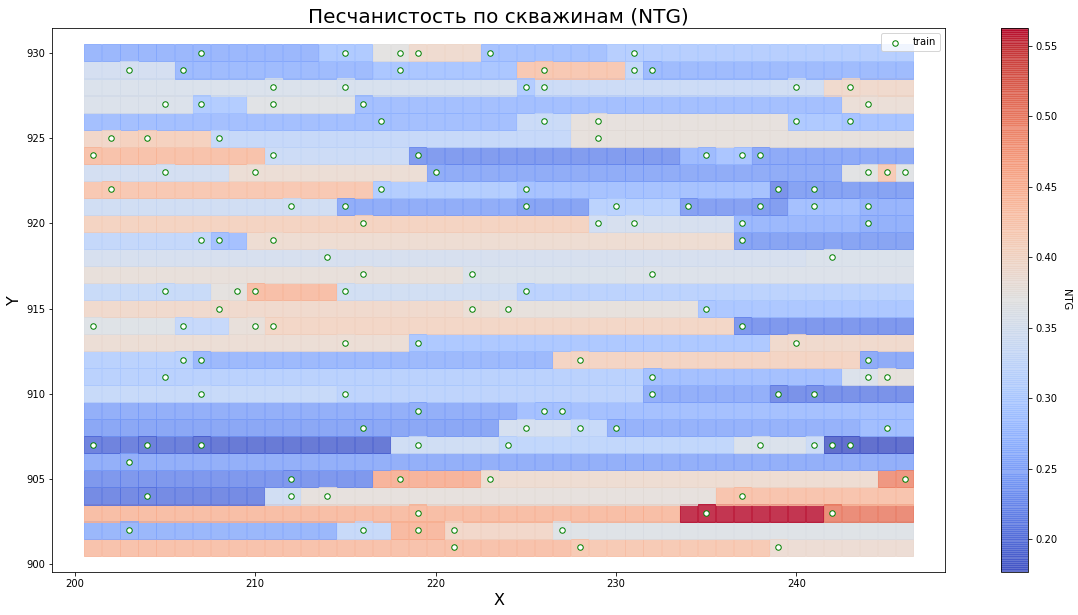

In [1425]:
visualisation_results_2(train_data, test_data, name_of_prediction_column='sub1')

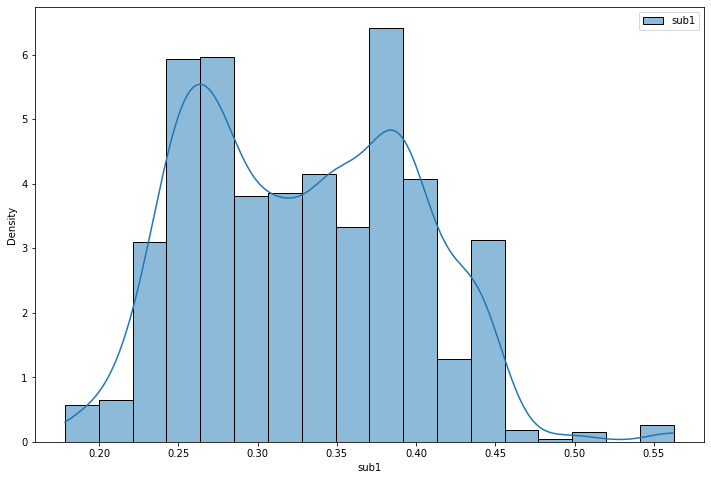

In [1553]:
show_hist(test_data, column='sub1')

4. Выводы по результатам

Идея данного алгоритма была основана на том, что на одинаковыз уровнях $Y$ песчанистость похожа - поэтому результаты предсказания ожидаемые. Алгоритм кажется лёгким, но данную модель можно использовать в совокупности с другими предсказаниями, рассмотренными ниже. Сохраним результаты.

In [1292]:
def submissions(data, column_name):
    data_copy = data.copy()
    data_copy = data_copy.reset_index()[['Well', 'X', 'Y', column_name]]
    data_copy.columns = ['Well', 'X', 'Y', 'NTG']
    data_copy.to_csv(f'submissions/sub_{column_name}.csv')

5. Сохранение попытки

In [439]:
submissions(test_data, 'sub1')

**Время посылки 1**: `27 фев 2021, 17:00:29`, `ID: 48880021`

## 4.2. K-ближайших соседей

### 4.2.1.`Submission 2` - K-Ближайших соседей по исходными координатам `(X, Y)`

1. Описание алгоритма

В первом пункте не использовались алгоритмы машинного обучения. Идея применения алгоритма $k$ ближайших соседей основана на следующем (уже озвученном) предположении: расположенны рядом скважины могут иметь похожие показатели песчаснистости.

В качестве ответа используется ансамбль алгоритмов `KNN` с различным значением числа соседей, а так же для балансировки алгоритм случайного леса. Параметры подбираются по сетке.

2. Программный код алгоритма

In [424]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

In [425]:
X = train_data[['X', 'Y']].values
y = train_data['NTG'].values

Подбор параметров по сетке.

In [426]:
cv = KFold(n_splits=3, shuffle=True)
model = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(2, 50),
              'weights': ['distance', 'uniform'],
              'p': [1, 2, 3]}
clf = GridSearchCV(model, 
                   parameters, 
                   cv=cv, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X, y)
clf.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')

Метрика качества `RMSE`:

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_i - a_i)^2}$$

где $y_i$ - истинный ответ, а $a_i$ - ответ алгоритма.

In [427]:
def root_mean_squared_error(y, a):
    return np.sqrt(np.mean((y - a) ** 2))

Валидация по фолдам.

In [428]:
regressors = []
cv = KFold(n_splits=5, shuffle=True)
for i in range(10):
    rmse = []
    knn6 = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')
    knn25 = KNeighborsRegressor(n_neighbors=10, p=1,weights='distance')
    rf = RandomForestRegressor(random_state=42, max_depth=14)
    vr = VotingRegressor([('knn6', knn6), 
                          ('knn7', knn7), 
                          ('knn', knn25), 
                          ('rf', rf)])
    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05556544669076563
iteration 1, RMSE: 0.05794715323140204
iteration 2, RMSE: 0.06083319920273035
iteration 3, RMSE: 0.055922362877658026
iteration 4, RMSE: 0.05898608462729327
iteration 5, RMSE: 0.060969662913682464
iteration 6, RMSE: 0.057009219900758946
iteration 7, RMSE: 0.05757886307770643
iteration 8, RMSE: 0.05564051598049652
iteration 9, RMSE: 0.058647090205857955


Запись предсказания в таблицу.

In [432]:
X_tst = test_data[['X', 'Y']]
res = []
for c in regressors:
    res.append(c.predict(X_tst))
dat = pd.DataFrame(np.array(res).T)
test_data['sub2'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

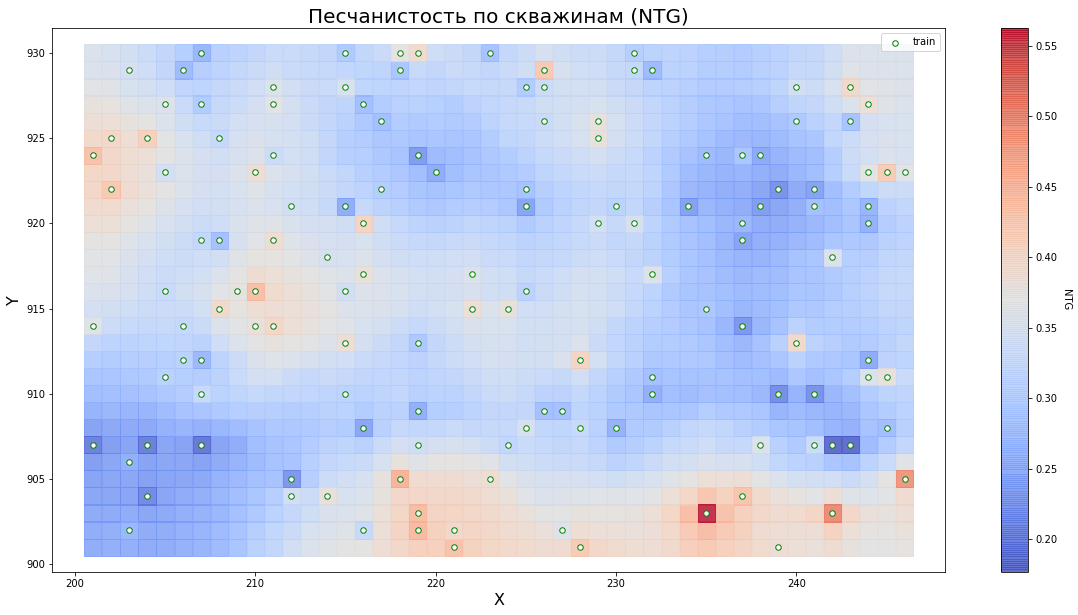

In [1159]:
visualisation_results_2(train_data, 
                        test_data, 
                        name_of_prediction_column='sub2')

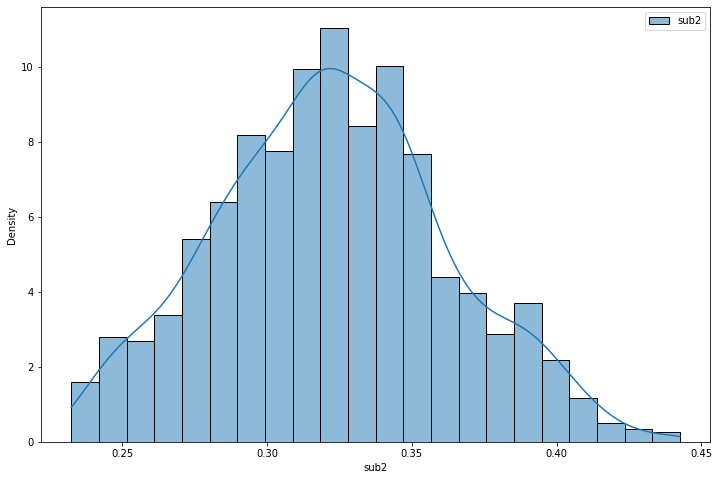

In [1554]:
show_hist(test_data, column='sub2')

4. Выводы по результатам

Данный метод позволяет немного сгладить получающие на графике поверхности и переходы между ними, но не учитывает горизонтальность песчанистости, а так же разбиение на кластеры (уровни).

5. Сохранение попытки

In [440]:
submissions(test_data, 'sub2')

**Время посылки 2**: `27 фев 2021, 17:19:48`, `ID: 48881241`

### 4.2.2 `Submission 3` - `K`-ближайших соседей по матрице расстояний

1. Описание алгоритма

Данный метод отличается от предыдущего лишь представлением признаков - координаты скважины $(X,Y)$ заменяются на расстояния до каждой из скважин. Расстояния получены с помощью построения матрицы расстояния по Евклидовой метрике.

2. Программный код алгоритма

In [454]:
from sklearn.metrics.pairwise import euclidean_distances

In [464]:
full = (
    pd.concat((train_data[['X', 'Y', 'Well']], 
               test_data.reset_index()[['X', 'Y', 'Well']]))
    .sort_values(by=['X', 'Y'])
    .reset_index(drop=True)
)

Получение матрицы расстояний

In [469]:
distanse = pd.DataFrame(euclidean_distances(full[['X', 'Y']]))

In [472]:
sortt = pd.concat((full, distanse), axis=1)
train = train_data.merge(sortt, on=['Well', 'X', 'Y'])
test =  test_data.merge(sortt, on=['Well', 'X', 'Y'])

In [511]:
X_1 = train.drop(labels=['Well', 'X', 'Y', 'NTG', 'cluster'], axis=1).values
y_1 = train['NTG'].values

X_testing = test.drop(labels=['Well', 'X', 'Y', 'sub1', 'sub2'], axis=1).values

In [513]:
X_testing.shape #размерность тестового признакового пространства

(1242, 1380)

In [514]:
X_1.shape #размерность тренировочного признакового пространства

(138, 1380)

Валидация по фолдам.

In [539]:
regressors = []
cv = KFold(n_splits=10, shuffle=True)
for i in range(10):
    rmse = []
    vr = KNeighborsRegressor(n_neighbors=6, p=1, weights='distance')
    for train_index, test_index in cv.split(X_1):
        X_train, X_test = X_1[train_index], X_1[test_index]
        y_train, y_test = y_1[train_index], y_1[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05743033608278995
iteration 1, RMSE: 0.05700851970172309
iteration 2, RMSE: 0.0592614383858411
iteration 3, RMSE: 0.0582601919942954
iteration 4, RMSE: 0.05842351036358066
iteration 5, RMSE: 0.0573450548331768
iteration 6, RMSE: 0.05850599390713081
iteration 7, RMSE: 0.05877581707913213
iteration 8, RMSE: 0.06061645340711469
iteration 9, RMSE: 0.05958919915046531


Запись предсказания в таблицу.

In [540]:
res = []
for c in regressors:
    res.append(c.predict(X_testing))
dat = pd.DataFrame(np.array(res).T)
test_data['sub3'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

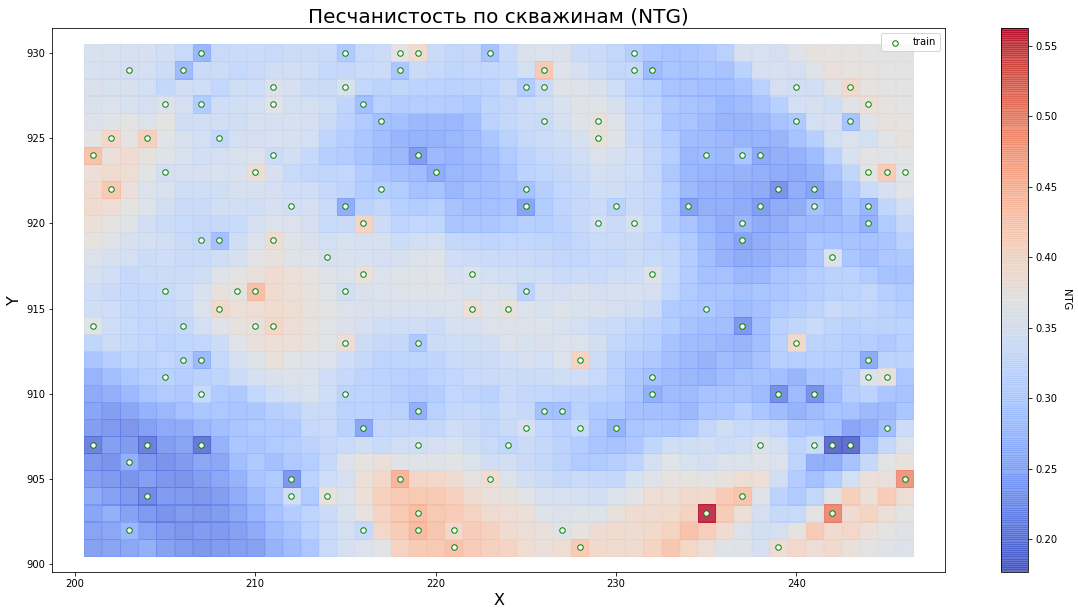

In [1160]:
visualisation_results_2(train_data, 
                        test_data, 
                        name_of_prediction_column='sub3')

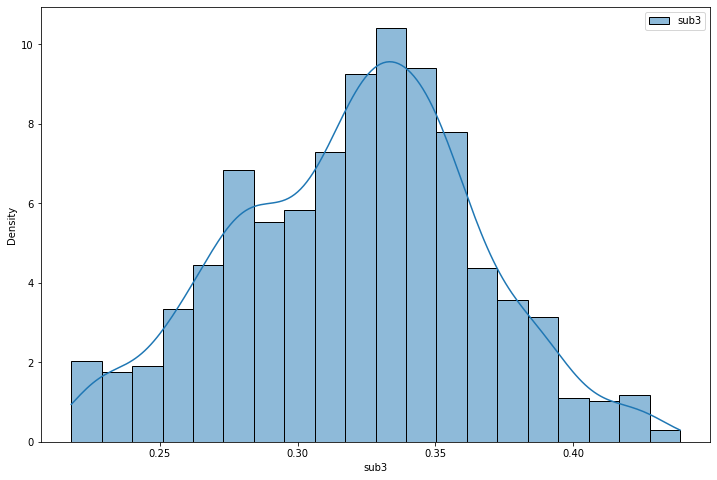

In [1555]:
show_hist(test_data, column='sub3')

4. Выводы по результатам

Качество алгоритма не особо проседает в сравнении с предыдущим методом, по графику выше заметна геометрия пространства - присутствуют выраженные диагональные линии.

5. Сохранение попытки

In [543]:
submissions(test_data, 'sub3')

**Время посылки 3**: `27 фев 2021, 18:05:12`, `ID: 48883989`

## 4.3. Кластеризация

### 4.3.1. `Submission 4` - Линейная модель над признаками агрегации кластеризации

1. Описание алгоритма

В пункте $(3.2)$ весьма подробно объяснялась возможная кластеризация по уровню $Y$ - в данном разделе будет использоваться именно эта идея. Основная идея алгоритма заключается в создании агрегированных признаков по уровню $Y$ для каждого из кластеров, а именно `min`, `max`, `median` и `mean` статистики. Над полученными признаками построим линейную модель - линейную регрессию.

В данном пункте $(4.3.1)$ речь идёт об кластеризации на максимальное возможное число кластеров по уровню $Y$ - 30.

2. Программный код алгоритма

In [547]:
y_range = np.arange(901, 931, 1)
mapY = dict(zip(y_range, range(0, y_range.shape[0])))
train_data['cluster'] = train_data['Y'].map(mapY) 
test_data['cluster'] = test_data['Y'].map(mapY)

Функция для получения основных характеристик по кластерам.

In [815]:
def featuresGet(train_data, 
                test_data, 
                columns=['cluster'], 
                agg_statistic = ['min', 'max', 'mean', 'median']):  
    
    train_copy = train_data.copy()
    test_copy = test_data.copy()
    for new_column in columns:
        for stat in agg_statistic:
            grouped = (
                train_copy
                .groupby(by=new_column)
                .agg({'NTG':stat})
            )
            grouped.reset_index(inplace=True)
            grouped.columns = [new_column, f'NTG_{new_column}_{agg_statistic}']
            train_copy = train_copy.merge(grouped, on=new_column, how='left')
            test_copy = test_copy.merge(grouped, on=new_column, how='left')
            
    return train_copy, test_copy

Генерация признаков с помощью кластеризации.

In [633]:
train_cluster, test_cluster = featuresGet(train_data, test_data)

Отбор признаков.

In [634]:
features = ['X', 'cluster', 'NTG_cluster_mean', 
            'NTG_cluster_median', 'NTG_cluster_min', 'NTG_cluster_max']

Валидация модели.

In [635]:
X_2 = train_cluster[features].values
X_testt = test_cluster[features].values

In [636]:
from sklearn.linear_model import LinearRegression

In [637]:
regressors = []
cv = KFold(n_splits=5, shuffle=True)
for i in range(10):
    rmse = []
    vr = LinearRegression()
    for train_index, test_index in cv.split(X_2):
        X_train, X_test = X_2[train_index], X_2[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05827836737681441
iteration 1, RMSE: 0.055304332320066506
iteration 2, RMSE: 0.05795885701099608
iteration 3, RMSE: 0.05658896548364741
iteration 4, RMSE: 0.05762468238732542
iteration 5, RMSE: 0.0579674167665142
iteration 6, RMSE: 0.057119500854119154
iteration 7, RMSE: 0.05811419632698793
iteration 8, RMSE: 0.056590262980521576
iteration 9, RMSE: 0.056174751985161406


Запись предсказания в таблицу.

In [638]:
res = []
for c in regressors:
    res.append(c.predict(X_testt))
dat = pd.DataFrame(np.array(res).T)
test_data['sub4'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

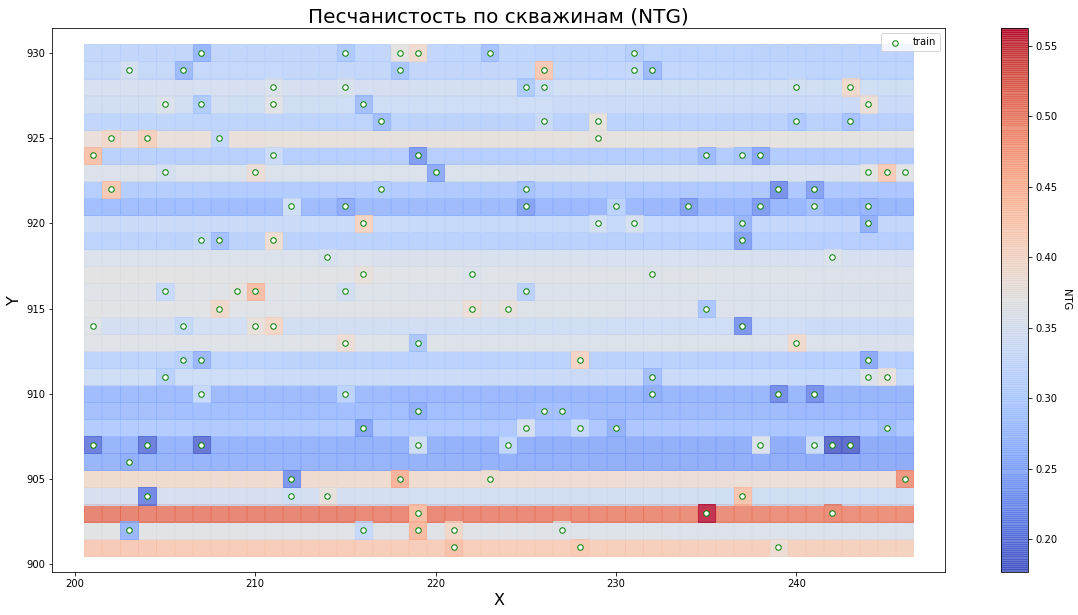

In [1161]:
visualisation_results_2(train_data, 
                        test_data, 
                        name_of_prediction_column='sub4')

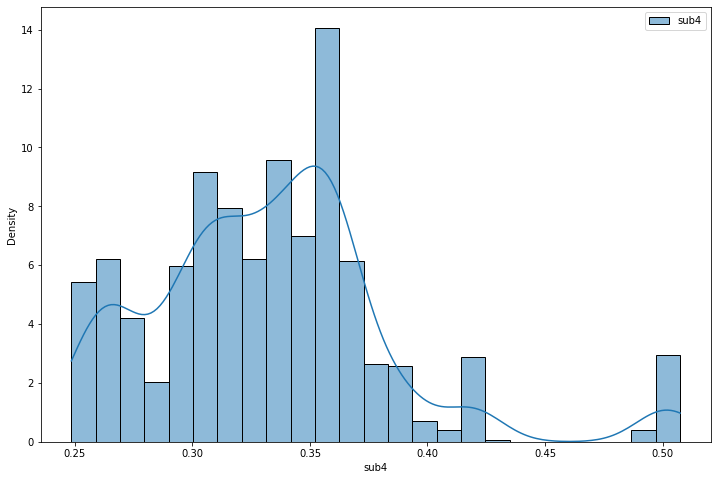

In [1556]:
show_hist(test_data, column='sub4')

4. Выводы по результатам

Видна геометрия алгоритма, по качеству модель не проседает в сравнении с предыдущими попытками.

5. Сохранение попытки

In [640]:
submissions(test_data, 'sub4')

**Время посылки 4**: `27 фев 2021, 18:57:58`, `ID: 48887398`

### 4.3.2. `Submission 5` - Ансамбль алгоритмов над признаками агрегации кластеризации, 10 кластеров

1. Описание алгоритма

Отличие данного алгоритма заключается в следующих вещах:

- при разбиении на $30$ кластеров по уровням $Y$ не учитывались возможные флуктуации песчанистости из одного уровня в другой (всё-таки линии песчанистости не являются прямыми). Поэтому при кластеризации было использовано меньшее число кластеров - $10$
- добавились агрегационные статистики не только в разрезре кластеров, но и в разрезе уровней $Y$
- над полученными признаками был построен ансамбль алгоритмов, состоящий из $3$-х случайных лесов с различной глубиной построения деревьев, одним методом ближайшего соседа и одной линейной регрессией.

2. Программный код алгоритма

Визуализация $10$ кластеров по уровням.

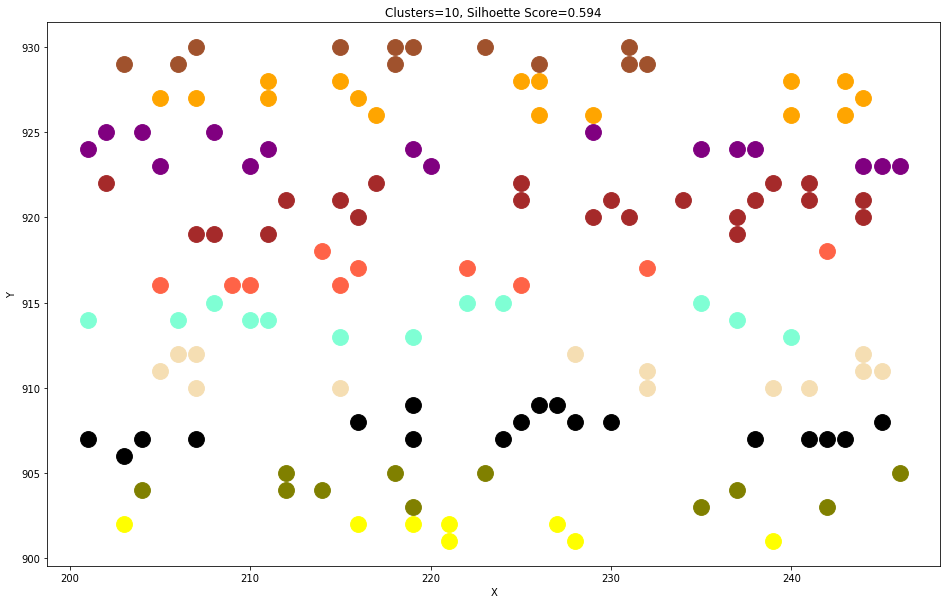

In [781]:
d = {}
for k in np.arange(10, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data[['Y']])
    fig, ax = plt.subplots(1,1,figsize=(16, 10))
    train_data['cluster_10'] = kmeans.labels_
    d[k] = silhouette_score(X=train_data[['Y']], labels=kmeans.labels_)
    for i in np.unique(train_data['cluster_10']):
        train_data[train_data['cluster_10'] == i].plot(kind='scatter', 
                                                       x='X', 
                                                       y='Y', 
                                                       ax=ax, 
                                                       color=color[::-1][i], 
                                                       s=250)
    ax.set_title(f'Clusters={k}, Silhoette Score={d[k]:.3}')
    plt.show()

Генерация признаков

In [782]:
test_data['cluster_10'] = kmeans.predict(test_data[['Y']])
train_cluster_10, test_cluster_10 = featuresGet(train_data, 
                                                test_data, 
                                                columns=['Y', 'cluster_10'])

Формирование обучающей выборки из признаков.

In [783]:
features_10 = ['X', 'Y', 'cluster_10', 'NTG_cluster_10_mean', 
               'NTG_cluster_10_median', 'NTG_cluster_10_min', 
               'NTG_cluster_10_max', 'NTG_Y_mean', 'NTG_Y_median', 
               'NTG_Y_min', 'NTG_Y_max']
X_2 = train_cluster_10[features_10].values
X_testt = test_cluster_10[features_10].values

Валидация.

In [784]:
regressors = []
cv = KFold(n_splits=5, shuffle=True)
for i in range(10):
    rmse = []
    rf = RandomForestRegressor(random_state=42, 
                               max_depth=14)
    rf1 = RandomForestRegressor(random_state=42, 
                                max_depth=None)
    rf2 = RandomForestRegressor(random_state=42, 
                                min_samples_leaf=2)
    rf3 = RandomForestRegressor(random_state=42, 
                                max_depth=3)
    rf4 = LinearRegression()
    rf5 = KNeighborsRegressor(n_neighbors=7, 
                              p=1,
                              weights='distance')
    vr = VotingRegressor([('1', rf), 
                          ('2', rf1), 
                          ('3', rf2), 
                          ('4', rf3),  
                          ('5', rf4), 
                          ('6', rf5)])
    for train_index, test_index in cv.split(X_2):
        X_train, X_test = X_2[train_index], X_2[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.060609295145834186
iteration 1, RMSE: 0.060534694560462635
iteration 2, RMSE: 0.05839613892591063
iteration 3, RMSE: 0.05867800803574528
iteration 4, RMSE: 0.05943540669993921
iteration 5, RMSE: 0.05817053420877559
iteration 6, RMSE: 0.05834861456344861
iteration 7, RMSE: 0.06071278444416495
iteration 8, RMSE: 0.058958807552343395
iteration 9, RMSE: 0.05760704009611587


Запись предсказания в таблицу.

In [785]:
res = []
for c in regressors:
    res.append(c.predict(X_testt))
dat = pd.DataFrame(np.array(res).T)
test_data['sub5'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

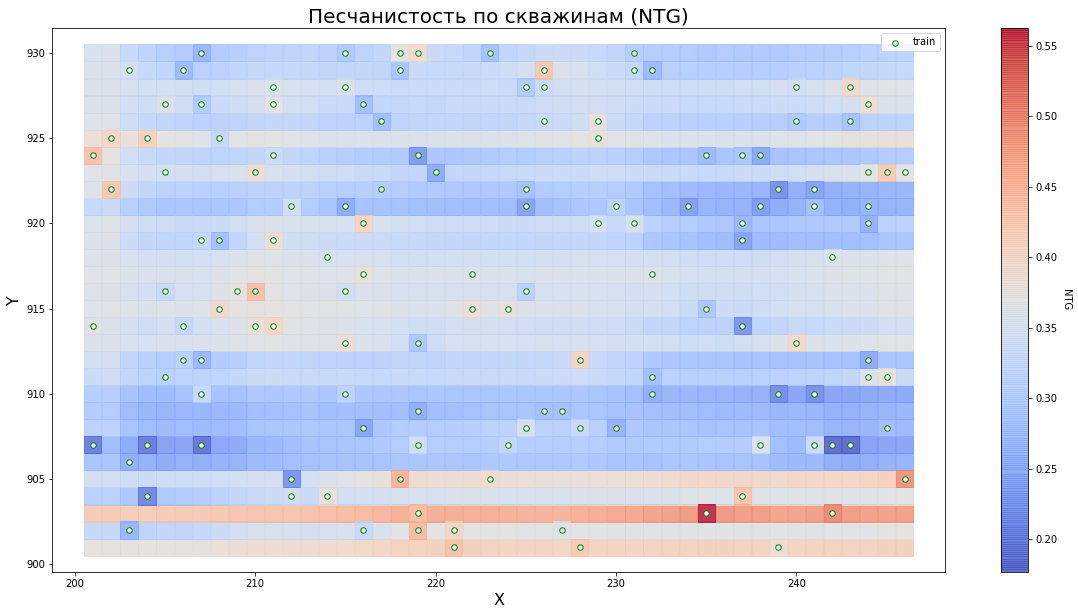

In [1162]:
visualisation_results_2(train_data, 
                        test_data, 
                        name_of_prediction_column='sub5')

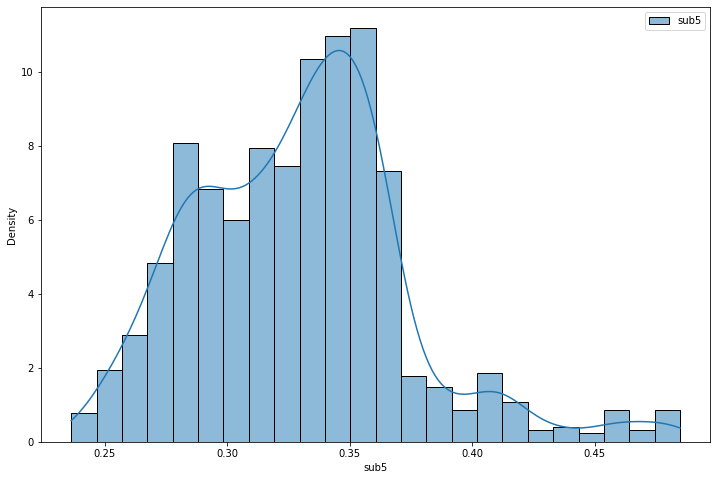

In [1557]:
show_hist(test_data, column='sub5')

4. Выводы по результатам

По сранвению с кластеризацией на $30$ уровней, геометрия предсказания не изменилась особо, а вот значение метрики `rmse` ухудшилось, поэтому значительных улучшений не дала данная модель.

5. Сохранение попытки

In [787]:
submissions(test_data, 'sub5')

**Время посылки 5**: `27 фев 2021, 19:35:07`, `ID: 48889593`

### 4.3.3. `Submission 6` - Ансамбль алгоритмов II над признаками агрегации кластеризации, 25 кластеров

1. Описание алгоритма

Отличие данного алгоритма заключается в следующих вещах:

- использовано не максимальное количество кластеров, похволяющее увеличивать ширину уровней $Y$
- ансамбль алгоритмов состоит из $4$-х алгоритмов ближайших соседей с разным количеством `n_neighbors` и $4$ случайных леса с различным значением высоты дерева и количества элементов в листах деревьев.

2. Программный код алгоритма

Визуализация $25$ кластеров по уровням.

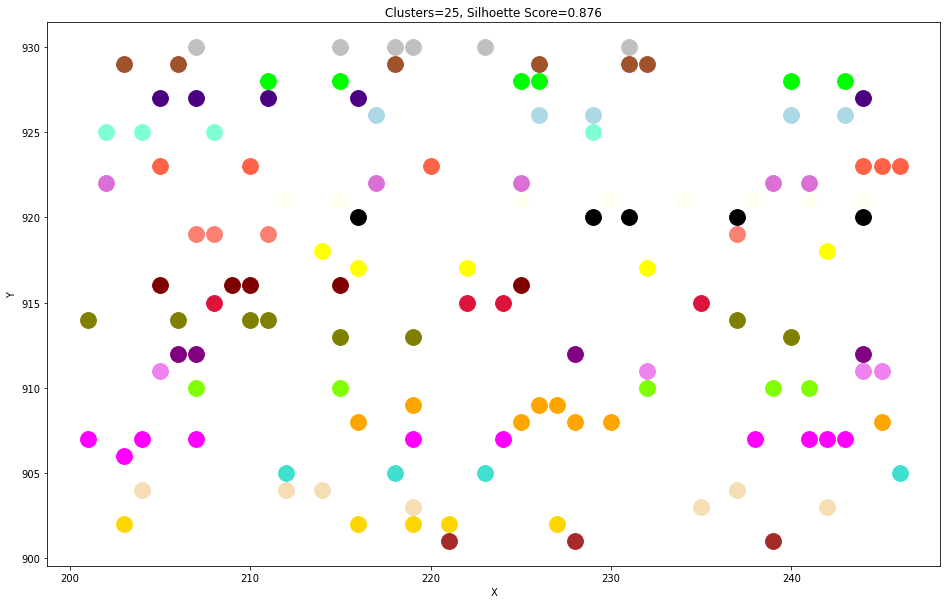

In [1201]:
d = {}
for k in np.arange(25, 26):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data[['Y']])
    fig, ax = plt.subplots(1,1,figsize=(16, 10))
    train_data['cluster_25'] = kmeans.labels_
    d[k] = silhouette_score(X=train_data[['Y']], labels=kmeans.labels_)
    for i in np.unique(train_data['cluster_25']):
        train_data[train_data['cluster_25'] == i].plot(kind='scatter', 
                                                       x='X', 
                                                       y='Y', 
                                                       ax=ax, 
                                                       color=color[::-1][i], 
                                                       s=250)
    ax.set_title(f'Clusters={k}, Silhoette Score={d[k]:.3}')
    plt.show()

Генерация признаков

In [1202]:
test_data['cluster_25'] = kmeans.predict(test_data[['Y']])
train_cluster_25, test_cluster_25 = featuresGet(train_data, 
                                                 test_data, 
                                                 columns=['Y', 'cluster_25'])

Формирование обучающей выборки из признаков.

In [1203]:
features_25 = ['X', 'Y', 'NTG_cluster_25_mean', 'NTG_cluster_25_median', 
               'NTG_cluster_25_min', 'NTG_cluster_25_max', 
               'NTG_Y_mean', 'NTG_Y_median', 'NTG_Y_min', 'NTG_Y_max']
X_2 = train_cluster_25[features_25].values
X_testt = test_cluster_25[features_25].values

Валидация и проверка обобщающей способности.

In [1204]:
regressors = []
cv = KFold(n_splits=5, shuffle=True)
for i in range(10):
    rmse = []
    knn2 = KNeighborsRegressor(n_neighbors=2, 
                               p=1, 
                               weights='distance')
    knn6 = KNeighborsRegressor(n_neighbors=6,
                               p=1, 
                               weights='distance')
    knn7 = KNeighborsRegressor(n_neighbors=7, 
                               p=1,
                               weights='distance')
    knn25 = KNeighborsRegressor(n_neighbors=25, 
                                p=1,
                                weights='distance')
    rf = RandomForestRegressor(n_estimators=500, 
                               random_state=42,
                               max_depth=14)
    rf1 = RandomForestRegressor(n_estimators=500, 
                                random_state=42, 
                                max_depth=None)
    rf2 = RandomForestRegressor(n_estimators=500, 
                                random_state=42, 
                                min_samples_leaf=3)
    rf3 = RandomForestRegressor(n_estimators=500, 
                                random_state=42, 
                                min_samples_split=10)
    vr = VotingRegressor([('RF', rf), 
                          ('RF1', rf1),
                          ('RF2', rf2),
                          ('RF3', rf3), 
                          ('knn2', knn2), 
                          ('knn25', knn25)])
    for train_index, test_index in cv.split(X_2):
        X_train, X_test = X_2[train_index], X_2[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.059423928464465224
iteration 1, RMSE: 0.058551292690335266
iteration 2, RMSE: 0.05916795479767334
iteration 3, RMSE: 0.054581519278296256
iteration 4, RMSE: 0.05705651253616813
iteration 5, RMSE: 0.05586803548100601
iteration 6, RMSE: 0.05745637434225963
iteration 7, RMSE: 0.05954737639263765
iteration 8, RMSE: 0.05733371972037941
iteration 9, RMSE: 0.058191212330420586


Запись предсказания в таблицу.

In [1205]:
res = []
for c in regressors:
    res.append(c.predict(X_testt))
dat = pd.DataFrame(np.array(res).T)
test_data['sub6'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

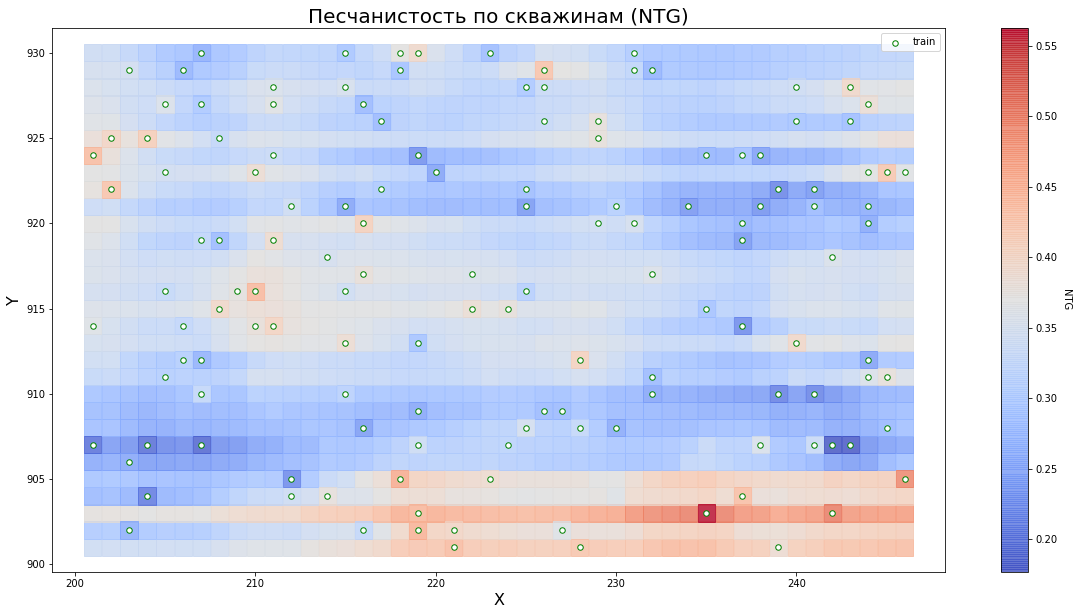

In [1206]:
visualisation_results_2(train_data, 
                        test_data, 
                        name_of_prediction_column='sub6')

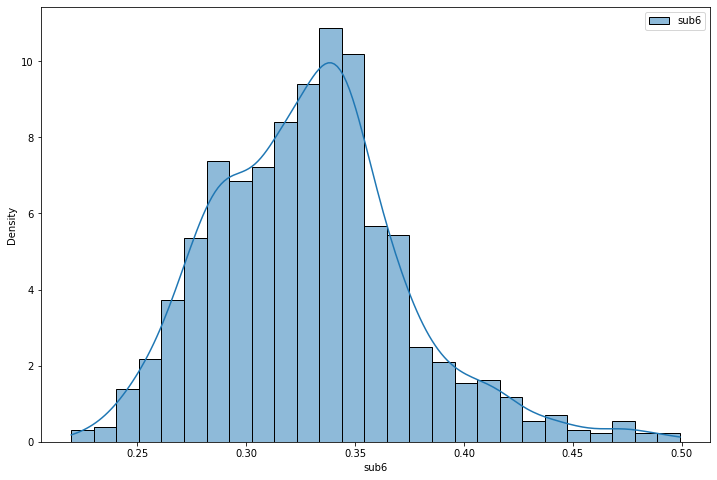

In [1558]:
show_hist(test_data, column='sub6')

4. Выводы по результатам

Результат кажется неплохим - есть некоторые переливы песчаности, но сохранена уровневая кластеризация. Сохраним результаты

5. Сохранение попытки

In [821]:
submissions(test_data, 'sub6')

**Время посылки 6**: `27 фев 2021, 20:00:34`, `ID: 48890974`

## 4.4. Ближайшие соседи

1. Описание алгоритма

Ещё одной идеей, использующей расстояния, является следующее улучешние - найдём по расстоянию ближайшие к данной скважине и сформируем признаковое пространство, состоящее из значений песчанистости `NTG` ближайших соседей скважины и расстояний до ближайших соседей. Чтобы это реализовать использовать следующие функции, высчитывающие матрицу расстояний *Евклида* и *Манхэттена* (`euclidean_distance`, `manhattan_distance`), а после по полученной матрице ищущие ближайших соседей оптимальным образом (`get_best_ranks`).

In [1176]:
def get_best_ranks(ranks, top, axis=1, return_ranks=False):
    '''
        Находит top-ближайших соседей для выборки
    '''
    indices = np.take(np.argpartition(ranks, range(-top, 0), axis=axis),
                      range(-1, -top-1, -1), axis=axis)
    result = (indices, )
    if return_ranks:
        ranks = np.take_along_axis(ranks, indices, axis=axis)
        result = (ranks, ) + result
    return result if len(result) > 1 else result[0]

def euclidean_distance(x, y):
    '''

    Parameters
    ----------
    x : np.ndarray размера N x D
        обучающая выборка.
    y : np.ndarray размера M x D
        тестовая выборка.

    Raises
    ------
    NotImplementedError
        DESCRIPTION.

    Returns
    -------
    Функция возвращает np.ndarray размера N x M,
    каждый элемент которого - евклидово расстояния между
    соответствующей парой векторов из массивов x и y.
    Уменьшим число операций с помощью трюка, раскрывая скобки.
    '''
    x2 = np.sum(x**2, axis=1).reshape(-1, 1)
    y2 = np.sum(y**2, axis=1)
    result = np.sqrt(x2 + y2 - 2 * x @ y.T)
    return result

def manhattan_distance(x, y, W=False):
    '''

    Parameters
    ----------
    x : np.ndarray размера N x D
        обучающая выборка.
    y : np.ndarray размера M x D
        тестовая выборка.

    Raises
    ------
    NotImplementedError
        DESCRIPTION.

    Returns
    -------
    Функция возвращает np.ndarray размера N x M,
    каждый элемент которого - расстояние манхэтэна между
    соответствующей парой векторов из массивов x и y.

    '''
    if type(W) == np.ndarray:
        result = np.sum(np.abs(x[:, None] - y) * W, axis=2)
    elif W == False:
        result = np.sum(np.abs(x[:, None] - y), axis=2) 
    return result

### 4.4.1 `Submission 7` - Ближайшие соседи по расстоянию Евклида

2. Программный код алгоритма

Формирование матрицы расстояний и признакового пространства.

In [1271]:
k = 15
dis = euclidean_distance(train_data[['X', 'Y']].values, 
                         train_data[['X', 'Y']].values)
result = get_best_ranks(-dis, top=k+1)[:, 1:]

In [1272]:
datm = pd.DataFrame(columns=[f'dist_{x}' for x in range(1, k+1)] + [f'NTG_{x}' for x in range(1, k+1)])

In [1273]:
for d, index in zip(dis, result):
    datm.loc[len(datm)] = np.r_[d[index], train_data.loc[index, 'NTG']]

In [1274]:
X3 = datm.values

In [1275]:
cv = KFold(n_splits=4, shuffle=True)
model = Ridge()
parameters = {'alpha': np.arange(0, 2, 0.01)}
clf = GridSearchCV(model, 
                   parameters, 
                   cv=cv, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X3, y)
clf.best_estimator_

Ridge(alpha=0.55)

In [1265]:
cv = KFold(n_splits=4, shuffle=True)
model = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(2, 25),
              'weights': ['distance', 'uniform'],
              'p': [1, 2, 3]}
clf = GridSearchCV(model, 
                   parameters, 
                   cv=cv, 
                   scoring='neg_root_mean_squared_error')
clf.fit(X3, y)
clf.best_estimator_

KNeighborsRegressor(n_neighbors=16, p=1, weights='distance')

Валидация и проверка обобщающей способности.

In [1280]:
regressors = []
cv = KFold(n_splits=5, shuffle=True)
for i in range(10):
    rmse = []
    vr = RandomForestRegressor(n_estimators=500)
    for train_index, test_index in cv.split(X3):
        X_train, X_test = X3[train_index], X3[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.060027549822865955
iteration 1, RMSE: 0.05821303889457724
iteration 2, RMSE: 0.05950349103459283
iteration 3, RMSE: 0.06020744171783841
iteration 4, RMSE: 0.05992918937356593
iteration 5, RMSE: 0.059634180320571176
iteration 6, RMSE: 0.06035980369797346
iteration 7, RMSE: 0.060379684753512165
iteration 8, RMSE: 0.062442527586417315
iteration 9, RMSE: 0.060402904077971


Запись предсказания в таблицу.

In [1283]:
k = 15
dis = euclidean_distance(test_data[['X', 'Y']].values, 
                         train_data[['X', 'Y']].values)
result = get_best_ranks(-dis, top=k+1)[:, 1:]
datm_test = pd.DataFrame(columns=[f'dist_{x}' for x in range(1, k+1)] + [f'NTG_{x}' for x in range(1, k+1)])
for d, index in zip(dis, result):
    datm_test.loc[len(datm_test)] = np.r_[d[index], train_data.loc[index, 'NTG']]

In [1285]:
X_testt = datm_test.values

In [1289]:
res = []
for c in regressors:
    res.append(c.predict(X_testt))
dat = pd.DataFrame(np.array(res).T)
test_data['sub_nn_dist_euclid'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

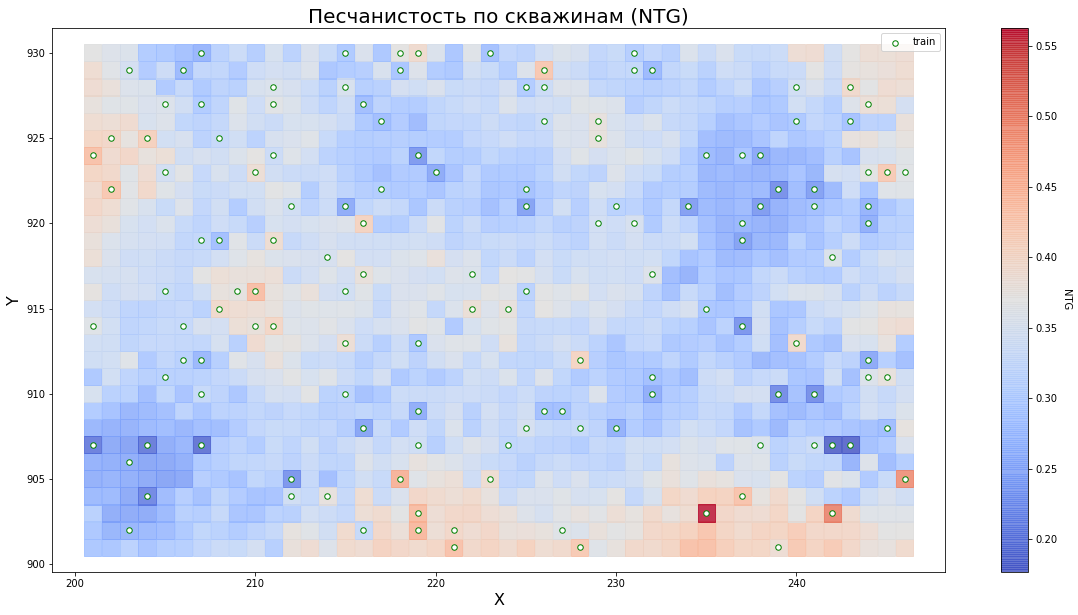

In [1291]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_nn_dist_euclid')

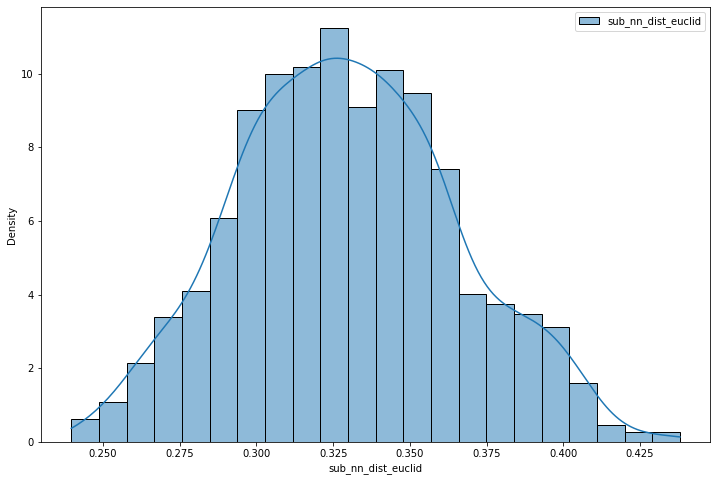

In [1559]:
show_hist(test_data, column='sub_nn_dist_euclid')

4. Выводы по результатам

Отправим данный результат в качестве попытки - по метрике качества на валидации по фолдам значение метрики неплохое.

5. Сохранение попытки

In [1293]:
submissions(test_data, 'sub_nn_dist_euclid')

**Время посылки 7**: `27 фев 2021, 23:09:53`, `ID: 48900545`

### 4.4.2. Ближайшие соседи по расстоянию Манхэттена

Формирование выборки и валидация модели.

In [1328]:
k = 8
dis = manhattan_distance(train_data[['X', 'Y']].values, 
                         train_data[['X', 'Y']].values)
result = get_best_ranks(-dis, top=k+1)[:, 1:]
datm = pd.DataFrame(columns=[f'dist_{x}' for x in range(1, k+1)] + [f'NTG_{x}' for x in range(1, k+1)])
for d, index in zip(dis, result):
    datm.loc[len(datm)] = np.r_[d[index], train_data.loc[index, 'NTG']]
X3 = datm.values

In [1332]:
regressors = []
cv = KFold(n_splits=3, shuffle=True)
for i in range(10):
    rmse = []
    vr = Ridge(alpha=0.55)
    for train_index, test_index in cv.split(X3):
        X_train, X_test = X3[train_index], X3[test_index]
        y_train, y_test = y[train_index], y[test_index]
        vr.fit(X_train, y_train)
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr.predict(X_test)))
    regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.06567996409725263
iteration 1, RMSE: 0.06485396648622539
iteration 2, RMSE: 0.0662566110454334
iteration 3, RMSE: 0.06331931509358597
iteration 4, RMSE: 0.06620726175156404
iteration 5, RMSE: 0.06723441491532499
iteration 6, RMSE: 0.06711747803850505
iteration 7, RMSE: 0.06340186674894717
iteration 8, RMSE: 0.0625412618007457
iteration 9, RMSE: 0.06315182471034138


Запись предсказания в таблицу.

In [1333]:
dis = euclidean_distance(test_data[['X', 'Y']].values, 
                         train_data[['X', 'Y']].values)
result = get_best_ranks(-dis, top=k+1)[:, 1:]
datm_test = pd.DataFrame(columns=[f'dist_{x}' for x in range(1, k+1)] + [f'NTG_{x}' for x in range(1, k+1)])
for d, index in zip(dis, result):
    datm_test.loc[len(datm_test)] = np.r_[d[index], train_data.loc[index, 'NTG']]

In [1334]:
X_testt = datm_test.values
res = []
for c in regressors:
    res.append(c.predict(X_testt))
dat = pd.DataFrame(np.array(res).T)
test_data['sub_nn_dist_mht'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

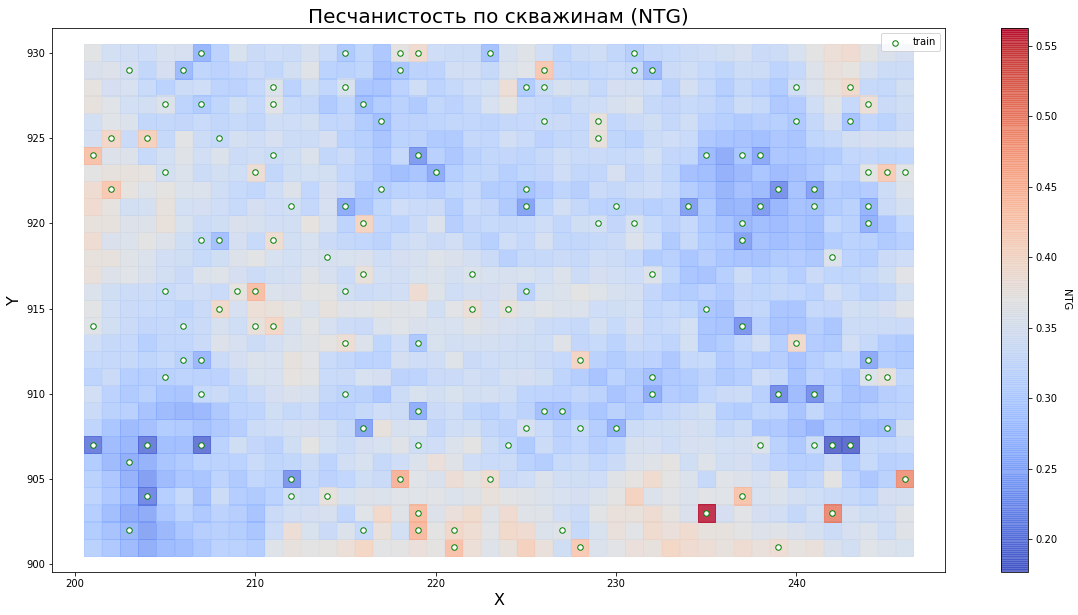

In [1335]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_nn_dist_mht')

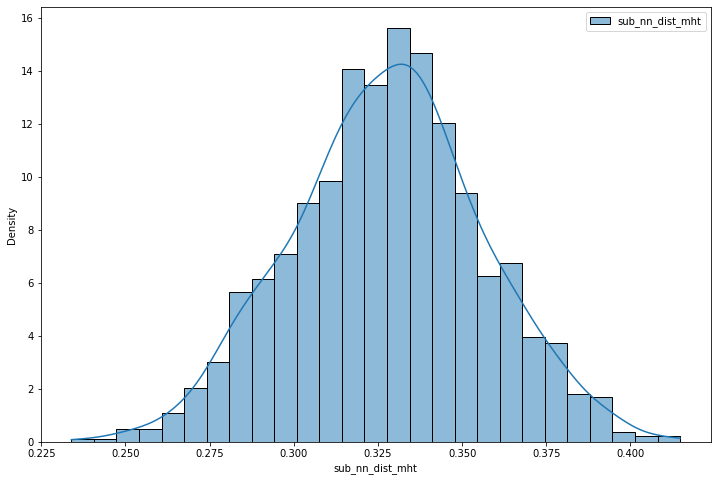

In [1560]:
show_hist(test_data, column='sub_nn_dist_mht')

## 4.5. `RBF - Radial Basis Function`

1. Описание алгоритма

Для объяснения применения радиально базисных функций будет введен некоторый математический аппарат.

**Опр**: Радиальная функция (`Radial function`) - функция вида:

$$\varphi_z(x) = f(||x-z||): \mathbb{R}^n \to \mathbb{R}$$

т.е. зависящая от расстояния (в более общем случае – любого) до какой-то точки.

**Опр**: Радиальная функция называется `радиально-базисной`, если для любого набора попарно различных точек $x_1,\ldots,x_m$, функции $\varphi_{x_1}(x), \ldots, \varphi_{x_m}(x)$ - линейно независимы и матрица $||\varphi_{x_j}(x_i)||_{m \times m}||$ невырождена:

$$||\varphi_{x_j}(x_i)||_{m \times m}|| = \begin{bmatrix} 
\varphi_{x_1}(x_1) & \ldots & \varphi_{x_m}(x_1) \\
\ldots & \ldots & \ldots \\
\varphi_{x_1}(x_m) & \ldots & \varphi_{x_m}(x_m) \\
\end{bmatrix}$$

Примеры радиальных функций:

1. `Gaussian`: $f(r) = e^{-\varepsilon r^2}$

2. `Multiquadric`: $f(r) = \sqrt{1 + \varepsilon r^2}$

3. `Inverse quadratic`: $f(r) = \frac{1}{1 + \varepsilon r^2}$

4. `Thin plate spline`: $f(r) = r^2 \ln r$

5. `Inverse multiquadric`: $f(r) = \frac{1}{\sqrt{1 + \varepsilon r^2}}$

6. `Polyharmonic spline`: $f(r) = \begin{cases} r^k, k = 1, 3, 5 \\ r^k \ln r, k = 2, 4, 6 \end{cases}$

7. `Linear` - $f(r)=r$

где $\varepsilon$ регулируют крутизну холма ядра, а $r$ - расстояние между векторами $x$ и $z$ - $||x-z||$. 

Основная идея заключается в следующем - будем использовать в качестве базиса нового пространства базис радиальных базисных функций - $\varphi(x-x_1), \varphi(x-x_2), \ldots, \varphi(x-x_n)$ и будем настраиваться на вектор $y$. Тогда ответом будет линейная комбинация данных радиальных функций.

Данный метод хорош, когда речь идёт о некоторой нелинейности в данных - как было видно при визуализации данных, данная нелинейность присутствовала, поэтому попробовать данный метод стоит. Число признаков равно числу объектов тренировочной выборки.

Решением будет являться линейная комбинация базисных функций.

Для работы с радиально-базисными функциями будем использовать две библиотеки: `scipy.interpolate` и `sklearn`.

In [1311]:
from scipy.interpolate import Rbf
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
kernel = 1.0 * RBF(1.0)

### 4.5.1. `Submission 8` - `RBF Linear`

Будем использовать два ядра:

1. Линейное ядро - $f(r)=r + \text{smoothing}$ - с учётом предположения о некоторой горизонтальности песчанистости данная интерполяция кажется разумной (по сути матрица расстояний)
2. `Multiquadric`: $f(r) = \sqrt{1 + \varepsilon r^2}$

Рассмотрим подробно два метода.

2. Программный код алгоритма

На кросс-валидации (ручной) подобрал линейной ядро со смещением $\text{smothing} = 3$.

In [1368]:
regressors = []
cv = KFold(n_splits=4, shuffle=True)
rmse = []
for i in range(10):
    regressors = []
    for train_index, test_index in cv.split(X3):
        X_train, X_test = train_data['X'][train_index], train_data['X'][test_index]
        X1_train, X1_test = train_data['Y'][train_index], train_data['Y'][test_index]
        y_train, y_test = train_data['NTG'][train_index], train_data['NTG'][test_index]
        vr = Rbf(X_train, 
                 X1_train, 
                 y_train, 
                 function='linear', 
                 epsilon=0.01, 
                 smooth=3, 
                 norm='euclidean')
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr(X_test, X1_test)))
        regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05954400054554344
iteration 1, RMSE: 0.06005515428299822
iteration 2, RMSE: 0.05911094515211298
iteration 3, RMSE: 0.05887329826025946
iteration 4, RMSE: 0.05819936017778645
iteration 5, RMSE: 0.05852942477065729
iteration 6, RMSE: 0.05800177854967974
iteration 7, RMSE: 0.05793452164857745
iteration 8, RMSE: 0.0578984975342627
iteration 9, RMSE: 0.05775347579364807


Запись предсказания в таблицу.

In [1369]:
res = []
for c in regressors:
    res.append(c(test_data['X'], test_data['Y']))
dat = pd.DataFrame(np.array(res).T)
test_data['sub_rbf_cv'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

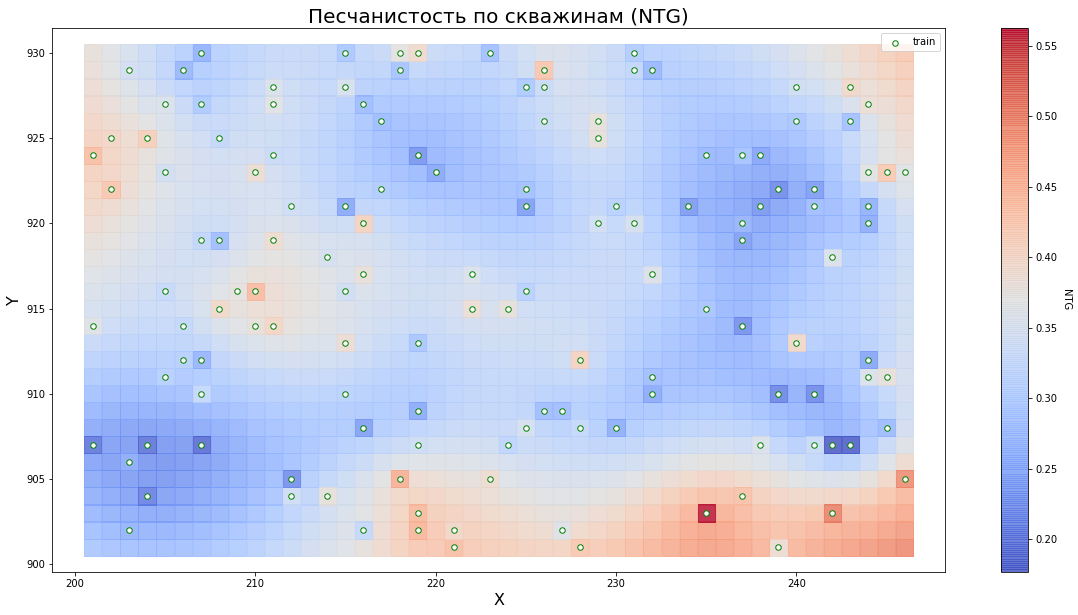

In [1370]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_rbf_cv')

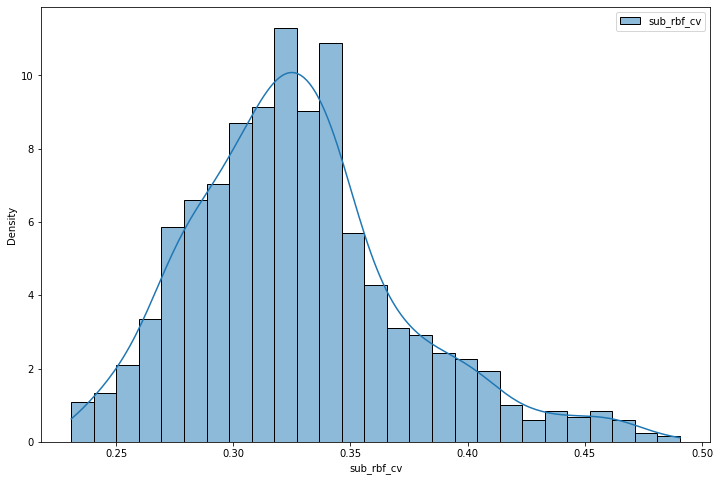

In [1561]:
show_hist(test_data, column='sub_rbf_cv')

4. Выводы по результатам

Видим, что в правом углу появились весьма красные зоны, да и по метрике мы побили качество на валидации. Сохраним результат и попробуем `Multiquadricядро`, используемое по умолчанию.

In [1371]:
submissions(test_data, 'sub_rbf_cv')

**Время посылки 8**: `27 фев 2021, 23:41:14`, `ID: 48901987`

### 4.5.2. `Submission 9` - RBF `Multiquadric`

Валидация и проверка обобщающей способности алгоритма.

In [1375]:
regressors = []
cv = KFold(n_splits=4, shuffle=True)
rmse = []
for i in range(10):
    regressors = []
    for train_index, test_index in cv.split(X3):
        X_train, X_test = train_data['X'][train_index], train_data['X'][test_index]
        X1_train, X1_test = train_data['Y'][train_index], train_data['Y'][test_index]
        y_train, y_test = train_data['NTG'][train_index], train_data['NTG'][test_index]
        vr = Rbf(X_train, 
                 X1_train, 
                 y_train, 
                 function='multiquadric', 
                 epsilon=0.015, 
                 smooth=0, 
                 norm='euclidean')
        rmse.append(root_mean_squared_error(y=y_test, 
                                            a=vr(X_test, X1_test)))
        regressors.append(vr)
    print(f'iteration {i}, RMSE: {np.mean(rmse)}')

iteration 0, RMSE: 0.05866668170273748
iteration 1, RMSE: 0.05780346363702891
iteration 2, RMSE: 0.05828855839318612
iteration 3, RMSE: 0.058765759198074155
iteration 4, RMSE: 0.05880573382803578
iteration 5, RMSE: 0.05788585418905925
iteration 6, RMSE: 0.0584236005039317
iteration 7, RMSE: 0.058571900755229125
iteration 8, RMSE: 0.05853118835561206
iteration 9, RMSE: 0.058851769276497934


Запись предсказания в таблицу.

In [1376]:
res = []
for c in regressors:
    res.append(c(test_data['X'], test_data['Y']))
dat = pd.DataFrame(np.array(res).T)
test_data['sub_rbf_mq'] = dat.mean(axis=1).values

3. Визуализация предсказаний алгоритма

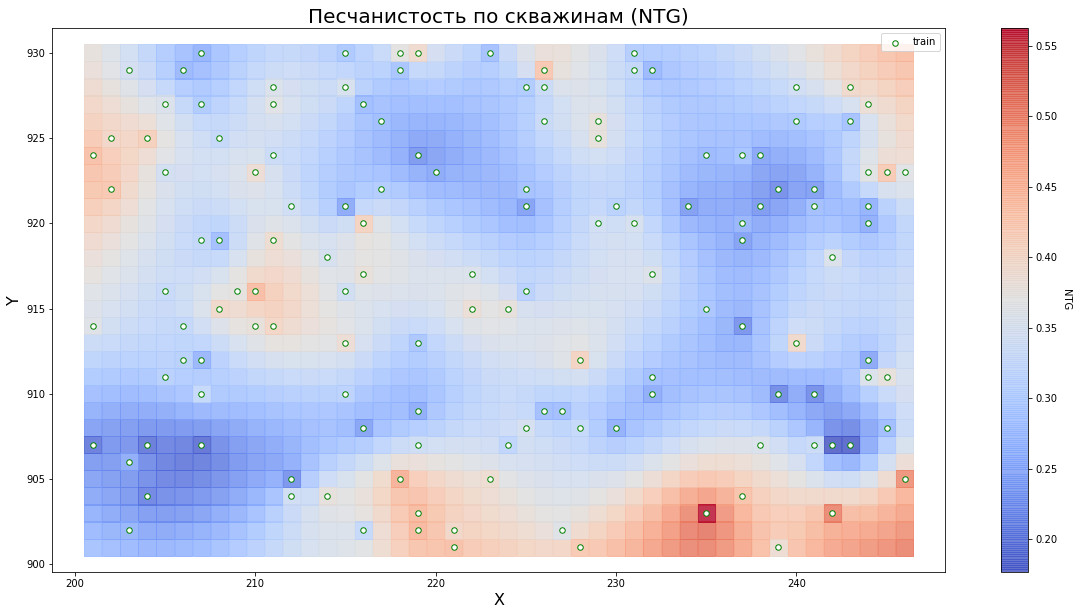

In [1377]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_rbf_mq')

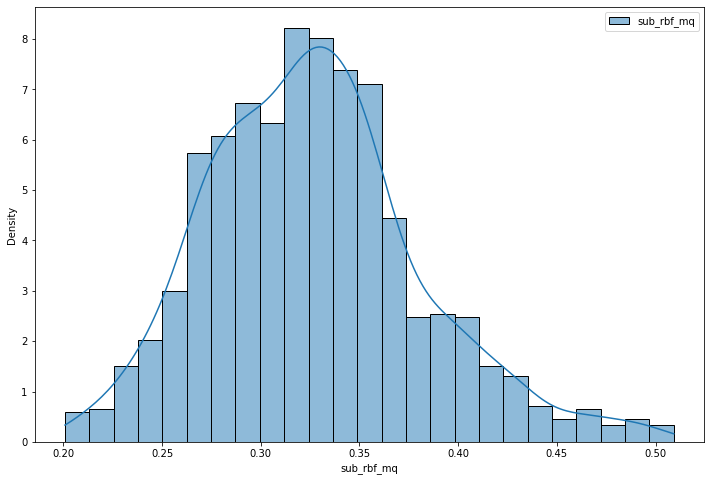

In [1562]:
show_hist(test_data, column='sub_rbf_mq')

4. Выводы по результатам

Значение метрики качества на валидации сравнимо с качеством лучших (до этого момента) алгоритмов.

5. Сохранение попытки

In [1380]:
submissions(test_data, 'sub_rbf_mq')

**Время посылки 9**: `27 фев 2021, 23:42:02`, `ID: 48902026`

## 4.6. Комитеты алгоритмов

1. Описание алгоритма

Решения являются результатом агрегации ответов раннее настроенных алгоритмов.

### 4.6.1 `Submission 10` - Агрегация максимумами

В качестве решения можно использовать линейную комбинацию ответов, представленных под идентификаторами `sub2`, `sub3` и `sub_rbf_mq`. Максимум данных алгоритмо дал гистограмму распределения ответов близкую к нормальному.

In [1419]:
test_data['sub_ensemble_knn1_knn2_rbf'] = np.max(test_data[['sub2', 'sub3', 'sub_rbf_mq']], axis=1)

Визуализация предсказаний алгоритма

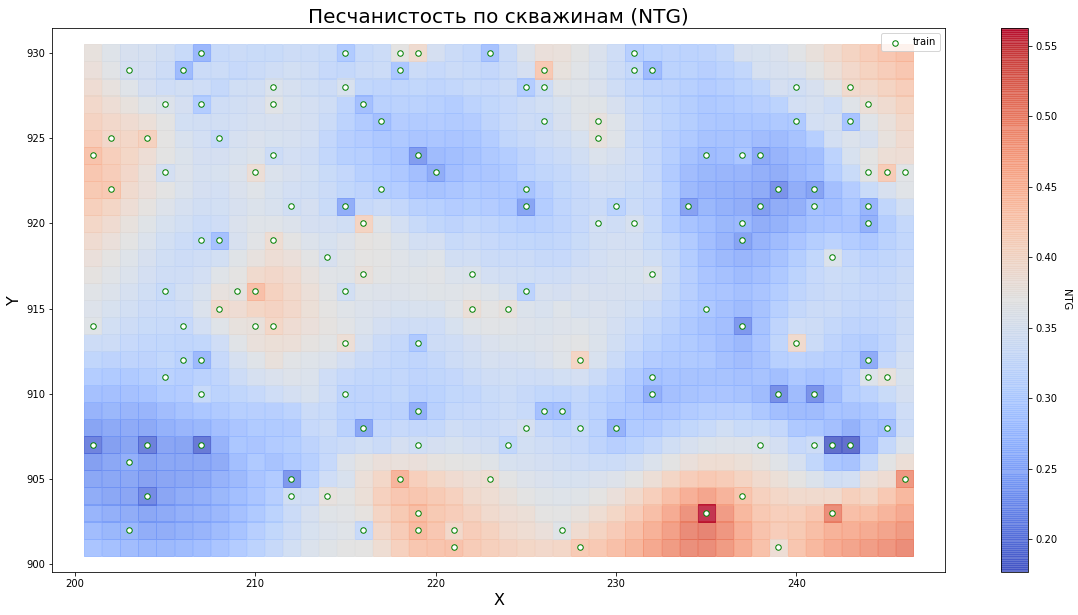

In [1420]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_ensemble_knn1_knn2_rbf')

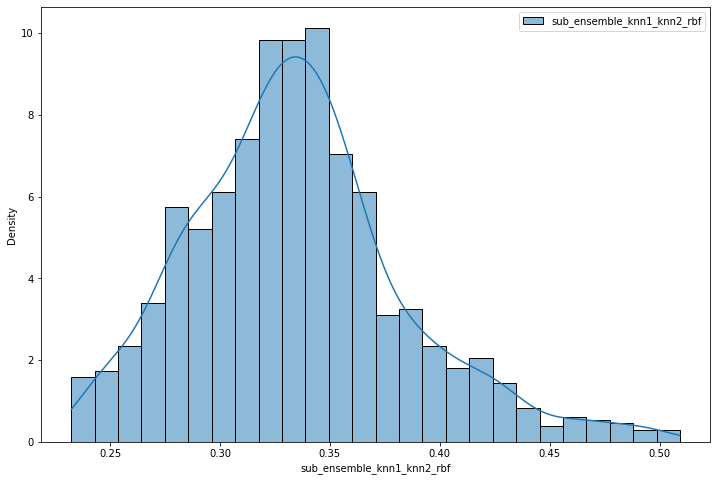

In [1563]:
show_hist(test_data, column='sub_ensemble_knn1_knn2_rbf')

Сохранение попытки

In [1421]:
submissions(test_data, 'sub_ensemble_knn1_knn2_rbf')

**Время посылки 10**: `28 фев 2021, 00:41:07`, `ID: 48904372`

### 4.6.2. `Submission 11` - Агрегация средними

In [1422]:
test_data['sub_ensemble_knn1_knn2_rbf_mean'] = np.mean(test_data[['sub2', 'sub3', 'sub_rbf_mq']], axis=1)

Визуализация предсказаний алгоритма

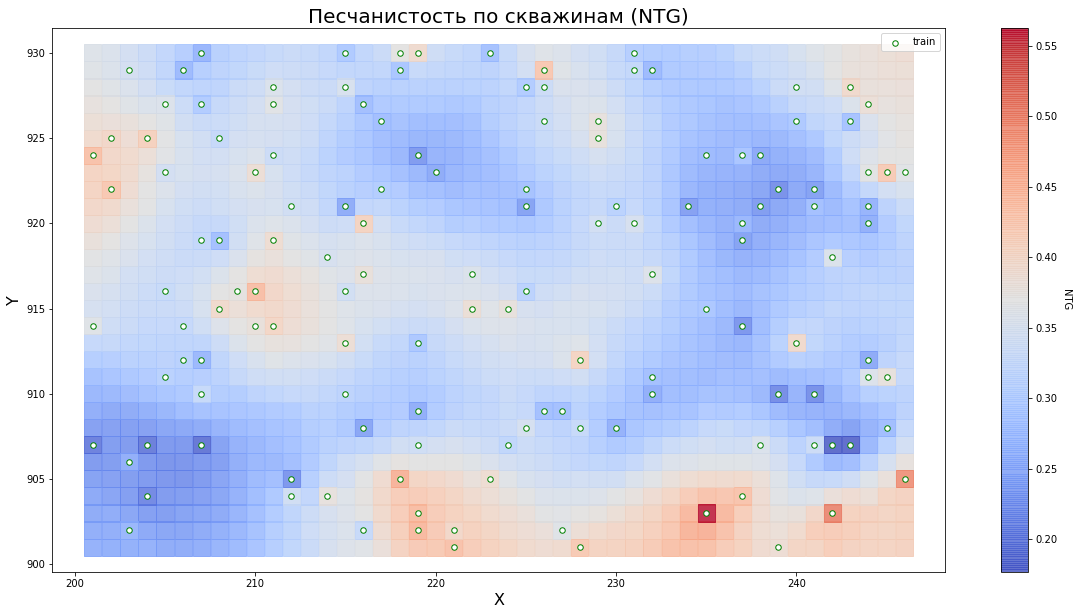

In [1423]:
visualisation_results_2(train_data,
                        test_data,
                        name_of_prediction_column='sub_ensemble_knn1_knn2_rbf_mean')

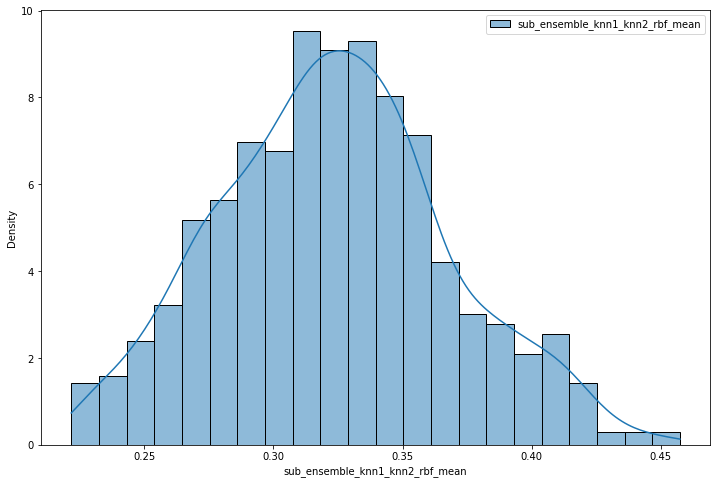

In [1564]:
show_hist(test_data, column='sub_ensemble_knn1_knn2_rbf_mean')

Сохранение попытки

In [1424]:
submissions(test_data, 'sub_ensemble_knn1_knn2_rbf_mean')

**Время посылки 11**: `28 фев 2021, 00:41:46`, `ID: 48904404`

### 4.6.3 `Submission 12` - Ближайшие соседи на уровне + `RBF`

In [1500]:
gpc = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(train_data[['X', 'Y']], y)
test_data['sub_gaussian_pr_regr_pdf'] = gpc.predict(test_data[['X', 'Y']])
test_data['sub_sub1+RBF_Gauss'] = (test_data['sub_nn'] + test_data['sub_gaussian_pr_regr_pdf']) / 2

Визуализация предсказаний алгоритма

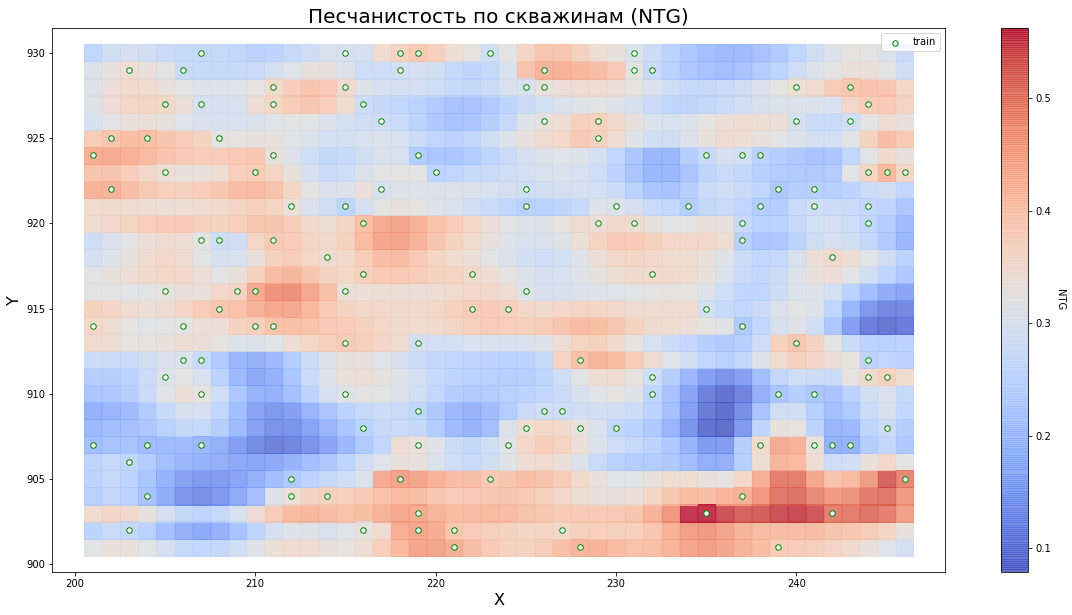

In [1501]:
visualisation_results_2(train_data, test_data, name_of_prediction_column='sub_sub1+RBF_Gauss')

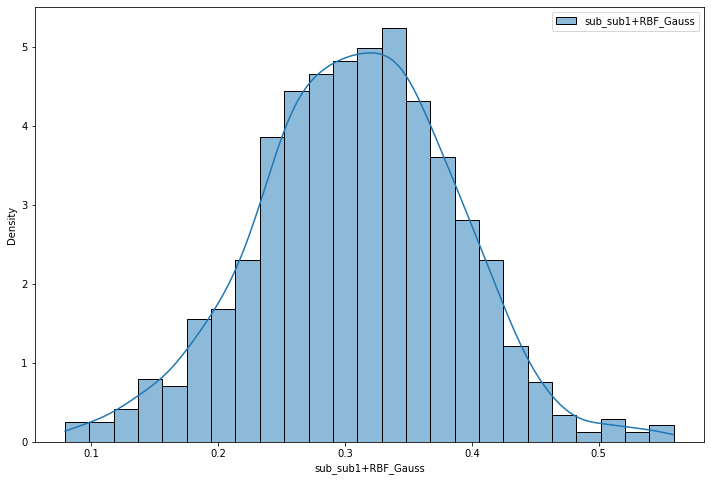

In [1565]:
show_hist(test_data, column='sub_sub1+RBF_Gauss')

Сохранение попытки

In [1502]:
submissions(test_data, 'sub_sub1+RBF_Gauss')

**Время посылки 12**: `28 фев 2021, 01:31:06`, `ID: 48906157`

# 5. Заключение

В данной работе были рассмотрены различные методы предсказания песчанистости: кластеризация и выделение основных признаков кластера, методы, основанные на расстоянии (ближайшие соседи по уровням, метод $k$-ближайших соседей, матрица расстояний), , методы основанные на радиально-базисных функциях, а так же комитеты над полученными ответами алгоритмов. Модели тестировались на валидационные выборке и в проверяющую систему было загружено $12$ решений.

**Источники**

- [sklearn.gaussian_process.kernels.RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html?highlight=rbf#sklearn.gaussian_process.kernels.RBF)
- [scipy.spatial.distance.dist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html)
- [scipy.interpolate.Rbf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html)
- [matplotlib interpolation](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html)
- [annotate imshow](https://stackoverflow.com/questions/19237703/how-do-you-annotate-a-matplotlib-imshow-map-with-an-arrow-and-text)
- [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

Спасибо!